In [1]:
import sys
sys.path.append("../src")

import pickle

from Utils import *
from networkx.readwrite import json_graph

In [2]:
%matplotlib inline

$$p(e_a|u_i)=\frac{\text{# posts by }u_i\text{ in } e_a}{\text{# posts by } u_i}$$

<br>

$$p(u_j|e_a)=\frac{\text{# posts by }u_j\text{ in } e_a}{\text{# posts in } e_a}$$

<br>

$$\textbf{BGR Similarity}(u_i, u_j)=p(u_j|u_i) = 1-\prod_{\forall u_i, u_j \in users, \forall e \in elements} (1-
p(e|u_i)p(u_j|e))$$

<br>
<br>

$$E(u) = \text{# links by user }u$$
<br>
$$\textbf{Jaccard Similarity}=J(u_i|u_j) = \frac{E(u_i) \cap E(u_j)}{E(u_i) \cup E(u_j)}$$

In [3]:
max_size = 2e4
filename = "../data/RC_2013-02"
bgr_similarities, jaccard_similarities, users_sentiments, users_subreddits =\
                    get_users_similarity(filename, max_size, threshold=1)

pickle.dump({"bgr":bgr_similarities, "jaccard":jaccard_similarities,
            "sentiments":users_sentiments, "subreddits":users_subreddits}, open("sims.pkl", 'wb'))

Read 8,000 comments
Read 16,000 comments
Read 20,000 comments
10,866 Users
7,980 Posts
15,800 (out of 15,800) edges with at least 1 mutual links
Calculating similarities


../src/Utils.py:232: UserWarning: Similarities are not normalized. Make sure to normalize as follows: BGR: 1-x, Jaccard as x[0]/x[1]
  warn("Similarities are not normalized. Make sure to normalize as follows: BGR: 1-x, Jaccard as x[0]/x[1]")


In [4]:
with open("sims.pkl", 'rb') as f:
    d = pickle.load(f)
    bgr_similarities = d["bgr"]
    jaccard_similarities = d["jaccard"]
    users_sentiments = d["sentiments"]
    users_subreddits = d["subreddits"]
g = construct_network(bgr_similarities, jaccard_similarities, "jaccard", 0.5, users_sentiments, users_subreddits)

del bgr_similarities, jaccard_similarities, users_sentiments, users_subreddits

3021 nodes
10248 edges


In [5]:
g = get_biggest_component(g)
g = augment_nodes(g)
for i, w in enumerate(['bgr', 'jac', 'w']):
    g = augment_nodes(g, weight=w, community_detection=False)

There are 540 components
1470 (48.66%) nodes		8616 (84.07%) edges
44 (1.46%) nodes		118 (1.15%) edges
25 (0.83%) nodes		40 (0.39%) edges
19 (0.63%) nodes		35 (0.34%) edges
15 (0.5%) nodes		52 (0.51%) edges


In [6]:
for n, data in g.nodes(data=True):
    for k, v in data.items():
        print(k, v)
    break

('subs', "(u'AskReddit', 100.0)")
('closeness', 0.16003921995860115)
('subreddit', u'AskReddit')
('subjectivity', 0.0)
('jac_degree', 10.5)
('polarity', 0.0)
('clustering coeff', 0.7692307692307693)
('w_degree', 14)
('betweenness', 0.0003129150903633737)
('bgr_eigenvector', 1.026391985134053e-08)
('w_clustering coeff', 0.15384615384615385)
('bgr_degree', 0.04832175925925919)
('bgr_betweenness', 0.0005084496174655569)
('degree', 14)
('pagerank', 0.0007676345626983795)
('jac_eigenvector', 4.1500179359112665e-07)
('jac_clustering coeff', 0.1424946860506164)
('jac_pagerank', 0.0007910384924419824)
('w_betweenness', 0.00023211325470965646)
('w_eigenvector', 1.8715069922313077e-06)
('bgr_pagerank', 0.000665135695614011)
('w_pagerank', 0.000763968574996992)
('bgr_clustering coeff', 0.006223364932692398)
('jac_betweenness', 0.0005787216443734016)
('eigenvector', 2.450070675694474e-06)


In [17]:
mini_g = sample_ntw(g)

with open("../snaps/reddit.json", 'w') as f:
    json.dump(json_graph.node_link_data(g), f)
    
with open("../snaps/mini_reddit.json", 'w') as f:
    json.dump(json_graph.node_link_data(mini_g), f)

Nodes: 1470 -->  500 (34.0136054422%)
Edges: 8616 -->  1164 (13.5097493036%)
There are 89 components
119 (23.8%) nodes		553 (47.51%) edges


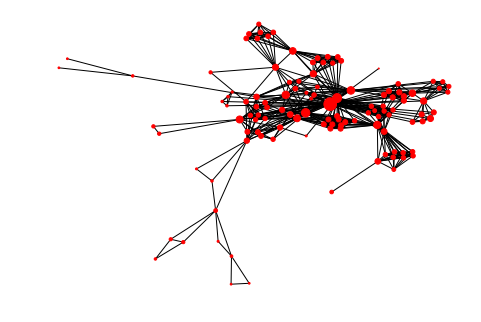

In [18]:
nx.draw(mini_g, node_size=[data["degree"] for n, data in mini_g.nodes(data=True)])